### Task : 1
### Name Of Task: Iris Flowers Classification ML Project
### Name : Thomas Markas Patole



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load DataSet

In [2]:
df = pd.read_csv('iris.data',names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualization

In [5]:
# Let's see how many different values are present
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
# Let See there is any missing value is presetn or not
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

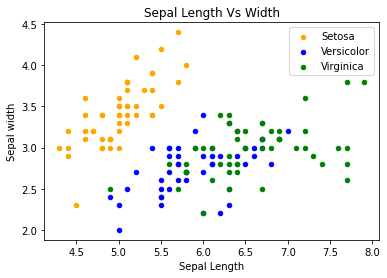

In [7]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind= 'scatter',x='SepalLengthCm',y='SepalWidthCm',color='Green',label='Virginica',ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal width')
fig.set_title('Sepal Length Vs Width')
plt.show()

### Data Insights:
1. Iris Setosa Species has smaller sepal length but Higher Width
2. Versicolor lies in almost middle for legth as well as width
3. Virginica has larger Sepal Legths and smaller sepal Width

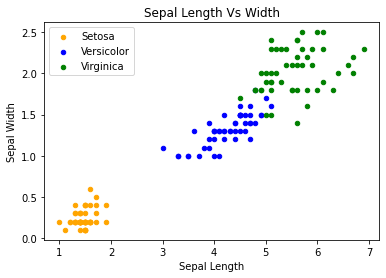

In [8]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='Versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='Virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')
plt.show()

### Data Insights
1. Setosa Species have the smallest petal length as well as petal width
2. Versicolor Species Have average petal Length and petal width
3. Virginica species have the highest petal length as well as Petal Width

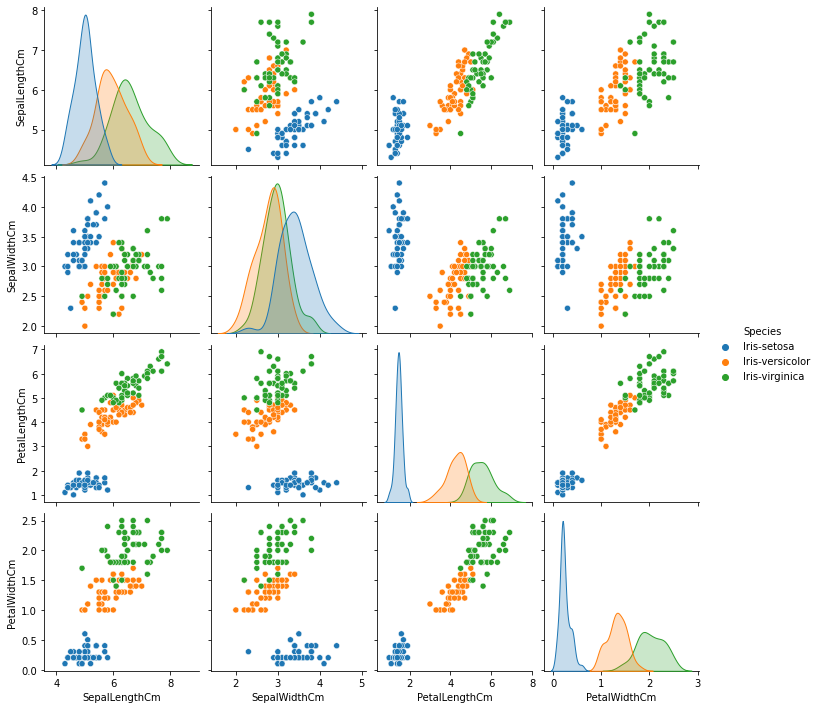

In [9]:
sns.pairplot(df,hue='Species')

### Now let us see how are the length and width are distributed

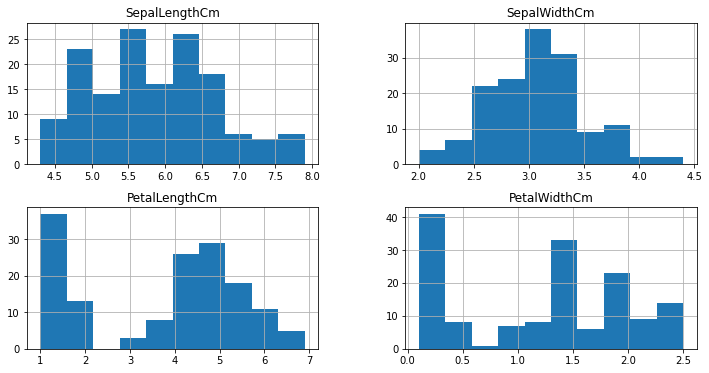

In [10]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)

### Now let us see how the length and width vary according to the species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

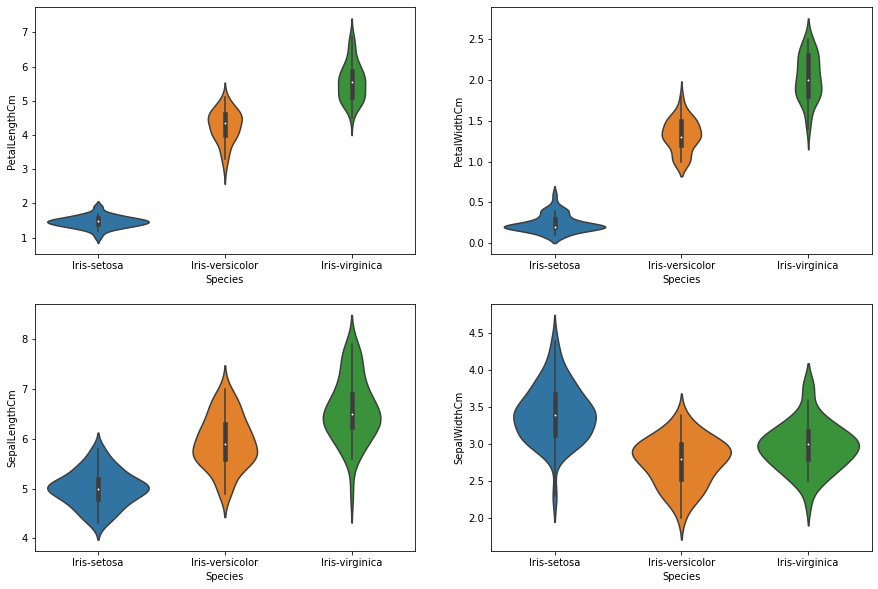

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y="SepalLengthCm",data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

__The violinplot show density of the length and width in the species. The Thinner part denotes that there is less density whereas the fatter part conveys higher density__

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

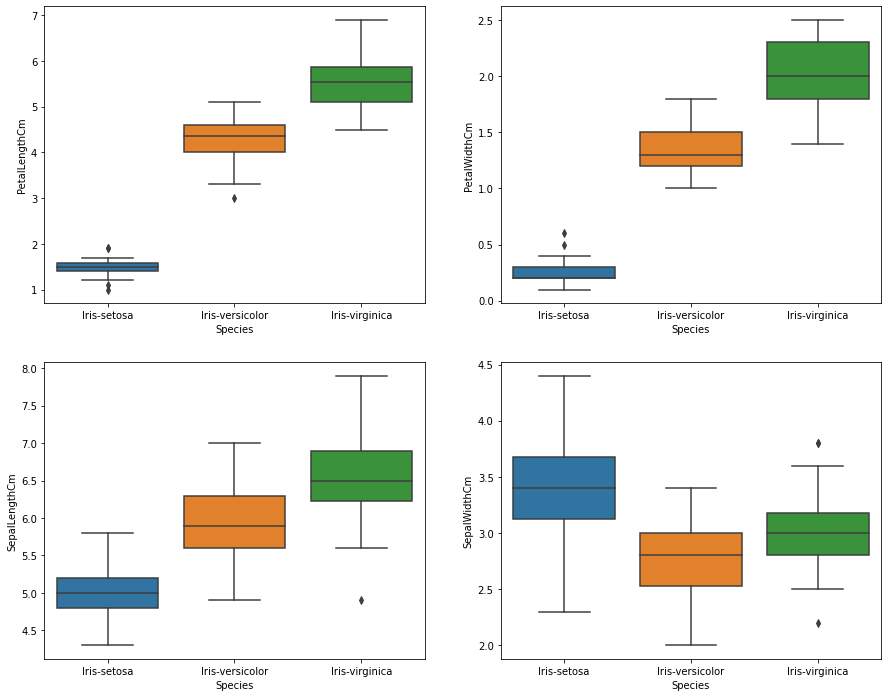

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

<AxesSubplot:>

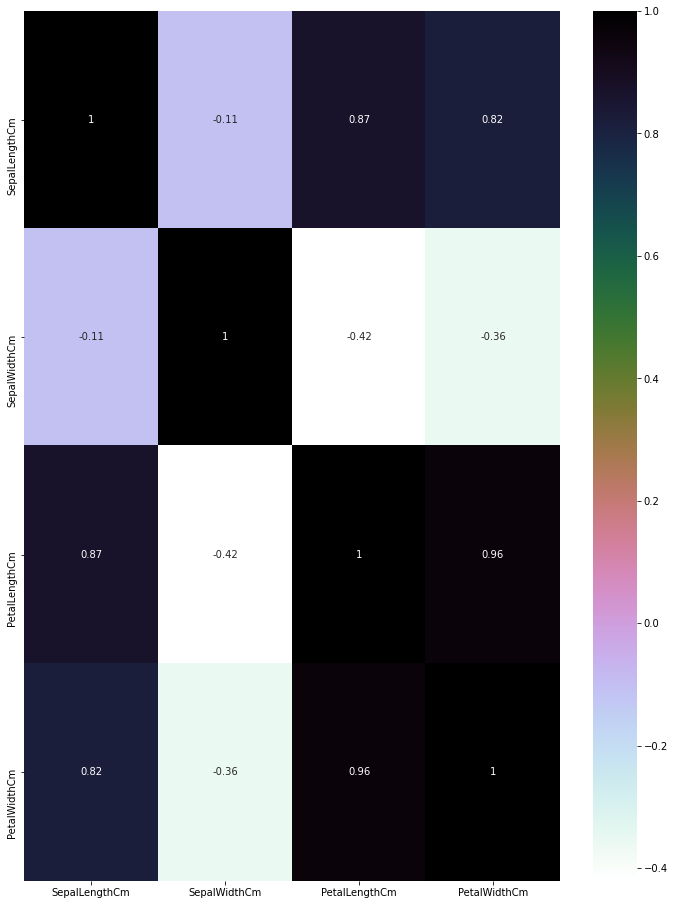

In [13]:
plt.figure(figsize=(12,16))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

### Checking For Duplicate Entries

In [14]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


__There are 3 duplicates Values we Just Remove it but In This dataset The Size is Very Small So that Why Not remoeve It But If the Dataset Size Is very Large Then Should Remove the Duplicates value.__

### Label Encoding



In [15]:
X = df.drop('Species',axis=1) # Independent Variable
Y = df['Species'] # dependent Variable



### Spliting the data into Train and test


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size= 0.3,random_state=42)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
Prdication = model.predict(X_test)
print("The Accuracy Of The Decision Tree",metrics.accuracy_score(Prdication,y_test))


The Accuracy Of The Decision Tree 1.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction= model.predict(X_test)
print('The Accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))


The Accuracy of the KNN is 1.0
